<font color=green> Привет еще раз. Спасибо, что доделал работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Нейтральные комментарии обозначу <font color=orange>оранжевым цветом</font>. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Извини за задержку при проверке(

Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично, воспринимай их в качестве рекомендаций; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Определение перспективного тарифа для телеком компании

Компании «Мегалайн» — федеральный оператор сотовой связи. Его клиентам предложено два тарифных плана: *«Смарт»* и *«Ультра»*. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Требуется проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

Для этого сравним и проанализируем количество сообщений и звонков, приносимую выручку, а также потребление траффика пользователями обоих тарифов. 

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Стоит также привести краткий план проведения самой работы. 

</div>

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

## Выгрузка данных

In [60]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import calendar
import math

### Calls

In [61]:
# Считаем данные из датасета calls, проверим корректность выгрузки
calls_data = pd.read_csv('/datasets/calls.csv')
calls_data.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [62]:
# Расмотрим общую информацию о данных
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [63]:
# Проверим данные на дубликаты
calls_data.duplicated().sum()

0

В таблице calls 4 столбца. В них содержится информация о звонках: 
* **id** — уникальный номер звонка
* **call_date** — дата звонка
* **duration** — длительность звонка в минутах
* **user_id** — идентификатор пользователя, сделавшего звонок  

В данных нет пропусков. Столбец с датой необходимо привести к временному типу. Столбец *user_id* является категориальным, поэтому его следует привести к типу *object*.

***

### Internet

In [64]:
# Считаем данные из датасета internet, проверим корректность выгрузки
internet_data = pd.read_csv('/datasets/internet.csv')
internet_data.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Столбец *Unnamed: 0* дублирует индексы таблицы. Скорее всего этот столбец возник из-за ошибки при выгрузке данных. Считаем датасет еще раз, задав параметр index_col=0. Таким образом мы зададим столбец 'Unnamed: 0' в качестве индексов.

In [65]:
# Считаем данные из датасета internet, проверим корректность выгрузки
internet_data = pd.read_csv('/datasets/internet.csv', index_col=0)
internet_data.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Задав параметр index_col=0 метода read_csv, мы можем сделать данный столбец 'Unnamed: 0' индексом, коим он и является. 

</div>

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

In [66]:
# Расмотрим общую информацию о данных
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [67]:
# Проверим данные на дубликаты
internet_data.duplicated().sum()

0

В таблице internet 4 столбца. В них содержится информация об интернет-сессиях:   
* **id** — уникальный номер сессии
* **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
* **session_date** — дата интернет-сессии
* **user_id** — идентификатор пользователя  

В данных нет пропусков. Столбец с датой необходимо привести к временному типу. Столбец user_id является категориальным, поэтому его следует привести к типу object.

***

### Messages

In [68]:
# Считаем данные из датасета messages, проверим корректность выгрузки
messages_data = pd.read_csv('/datasets/messages.csv')
messages_data.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [69]:
# Расмотрим общую информацию о данных
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [70]:
# Проверим данные на дубликаты
messages_data.duplicated().sum()

0

В таблице messages 3 столбца. В них содержится информация о сообщениях:  
* **id** — уникальный номер сообщения
* **message_date** — дата сообщения
* **user_id** — идентификатор пользователя, отправившего сообщение*  

В данных нет пропусков. Столбец с датой необходимо привести к временному типу. Столбец user_id является категориальным, поэтому его следует привести к типу object.

***

### Tariffs

In [71]:
# Считаем данные из датасета tariffs, проверим корректность выгрузки
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
tariffs_data.head(10) 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tariffs 8 столбцов. В них содержится информация о тарифах:  
* **tariff_name** — название тарифа
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со * 101 минуты будет взиматься плата)
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

Описание тарифов.  
Тариф **«Смарт»**
1. Ежемесячная плата: 550 рублей
1. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
1. Стоимость услуг сверх тарифного пакета:
1. минута разговора: 3 рубля
1. сообщение: 3 рубля
1. 1 Гб интернет-трафика: 200 рублей

Тариф **«Ультра»**
1. Ежемесячная плата: 1950 рублей
1. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
1. Стоимость услуг сверх тарифного пакета:
1. минута разговора: 1 рубль
1. сообщение: 1 рубль
1. 1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

***

### Users

In [72]:
# Считаем данные из датасета users, проверим корректность выгрузки
users_data = pd.read_csv('/datasets/users.csv')
users_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [73]:
# Расмотрим общую информацию о данных
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [74]:
# Проверим данные на дубликаты
users_data.duplicated().sum()

0

В таблице users 8 столбцjd. В них содержится информация о пользователях:  
* **user_id** — уникальный идентификатор пользователя
* **first_name** — имя пользователя
* **last_name** — фамилия пользователя
* **age** — возраст пользователя (годы)
* **reg_date** — дата подключения тарифа (день, месяц, год)
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* **city** — город проживания пользователя
* **tariff** — название тарифного плана  

В данных нет пропусков. Столбцы с датой необходимо привести к временному типу. Столбец user_id является категориальным, поэтому его следует привести к типу object.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицы выполнен.

</div>

## Предобработка данных

### Приведение типов

In [75]:
# Таблица calls_data
# Приведем столбец call_date к временному типу, а user_id к строковому, и проверим результат
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
calls_data['user_id'] = calls_data['user_id'].apply(str)

print ("Тип столбца call_date: {}".format(calls_data['call_date'].dtype))
print ("Тип столбца user_id: {}".format( calls_data['user_id'].dtype))

Тип столбца call_date: datetime64[ns]
Тип столбца user_id: object


In [76]:
# Таблица internet_data
# Приведем столбец session_date к временному типу, а user_id к строковому, и проверим результат
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
internet_data['user_id'] = internet_data['user_id'].apply(str)

print ("Тип столбца session_date: {}".format(internet_data['session_date'].dtype))
print ("Тип столбца user_id: {}".format( internet_data['user_id'].dtype))

Тип столбца session_date: datetime64[ns]
Тип столбца user_id: object


In [77]:
# Таблица messages_data
# Приведем столбец session_date к временному типу, а user_id к строковому, и проверим результат
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
messages_data['user_id'] = messages_data['user_id'].apply(str)

print ("Тип столбца message_date: {}".format(messages_data['message_date'].dtype))
print ("Тип столбца user_id: {}".format( messages_data['user_id'].dtype))

Тип столбца message_date: datetime64[ns]
Тип столбца user_id: object


In [78]:
# Таблица users_data
# Приведем столбец reg_date и churn_date к временному типу, а user_id к строковому, и проверим результат
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['user_id'] = users_data['user_id'].apply(str)

print ("Тип столбца reg_date: {}".format(users_data['reg_date'].dtype))
print ("Тип столбца churn_date: {}".format(users_data['churn_date'].dtype))
print ("Тип столбца user_id: {}".format( users_data['user_id'].dtype))

Тип столбца reg_date: datetime64[ns]
Тип столбца churn_date: datetime64[ns]
Тип столбца user_id: object


### Корректировка данных

Исправим ошибки и подготовим данные.

In [79]:
# Проверим количество нулевых значений в столбце duration таблицы calls_data
print ("Количество нулей в столбце duration: {}".format(calls_data.query('duration == 0')['duration'].count()))
print ("Доля нулей в столбце duration: {:.2%}".format(calls_data.query('duration == 0')['duration'].count()/calls_data.shape[0]))

Количество нулей в столбце duration: 39613
Доля нулей в столбце duration: 19.55%


В *calls_data* в столбце **duration** длительность почти 20% звонков равняется 0.0 минут. Это могут быть пропущенные звонки, а может быть это ошибка при выгрузке данных. Будем исходить из предположения, что это короткие разговоры (пара секунд), случайно округленные вниз. Заменим такие нули на единицу.  
Кроме того, по условию тарифов необходимо все дробные значения округлить в большую сторону.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Исходя из описанной гипотезы звонки с нулевой длительностью обработаны правильным образом.

</div>

In [80]:
# Избавимся от нулей, округлим значения в большую сторону и проверим результат
calls_data['cleared_duration'] = calls_data['duration'].replace(0,1)
calls_data['cleared_duration'] = calls_data['cleared_duration'].apply(math.ceil)
calls_data.head(5)

,id,call_date,duration,user_id,cleared_duration
0,1000_0,2018-07-25,0.00,1000,1
1,1000_1,2018-08-17,0.00,1000,1
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

</div>

In [81]:
# Проверим количество нулевых значений в столбце mb_used таблицы internet_data
print ("Количество нулей в столбце mb_used: {}".format(internet_data.query('mb_used == 0')['mb_used'].count()))
print ("Доля нулей в столбце mb_used: {:.2%}".format(internet_data.query('mb_used == 0')['mb_used'].count()/internet_data.shape[0]))

Количество нулей в столбце mb_used: 19598
Доля нулей в столбце mb_used: 13.12%


Нулей довольно много. Скорее всего это вызвано тем, что сессии были очень короткими, и в них расходовалось мало трафика (байты, килобайты), и поэтому при выгрузке данные были случайно округлены в меньшую сторону. По условию тарифов необходимо все подобные  значения округлить в большую сторону.  
Заменим такие нули на единицу. Округлим значения столбца до целых в большую сторону.

In [82]:
# Округлим значения в большую сторону и проверим результат
internet_data['cleared_mb_used'] = internet_data['mb_used'].replace(0,1)
internet_data['cleared_mb_used'] = internet_data['mb_used'].apply(math.ceil)
internet_data.head(5)

,id,mb_used,session_date,user_id,cleared_mb_used
0,1000_0,112.95,2018-11-25,1000,113
1,1000_1,1052.81,2018-09-07,1000,1053
2,1000_2,1197.26,2018-06-25,1000,1198
3,1000_3,550.27,2018-08-22,1000,551
4,1000_4,302.56,2018-09-24,1000,303


<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

При неиспользовании интернета у нас бы не отображались интернет-сессии в данной таблице. Разберись с данными значениями подробнее. Пойми причину их появления, исходя из которой обработай данные значения. 

</div>

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

<font color=green> Предположение изменено, теперь появление таких значений, гипотеза, обработка нулей согласуются между собой. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Ошибки в таблицах исправлены. Данные подготовлены к дальнейшему анализу. 

</div>

### Подготовка вспомогательных данных

In [83]:
# Переведм мегабайты в гигабайты, приведем столбец к целочисленному типу и проверим результат
tariffs_data ['gb_per_month_included'] = (tariffs_data ['mb_per_month_included'] /1024).astype('int')
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [84]:
# Добавим в таблицу calls_data столбец с месяцем, сгруппируем данные по пользователям и месяцам. 
# Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Проверим результат 

#### calls_data['call_month'] = calls_data['call_date'].dt.strftime("%B")
calls_data['month'] = calls_data['call_date'].dt.month

calls_grouped = (calls_data
                     .groupby(['user_id','month'])
                     .agg({'user_id': 'count','cleared_duration': 'sum'} )                         
                    )
calls_grouped.columns = ['calls_count', 'calls_total_duration']
calls_grouped

calls_count  calls_total_duration
user_id month                                   
1000    5               22                   164
        6               43                   187
        7               47                   346
        8               52                   418
        9               58                   478
...                    ...                   ...
1498    10              41                   258
1499    9                9                    71
        10              68                   473
        11              74                   624
        12              69                   505

[3174 rows x 2 columns]

In [85]:
# Добавим в таблицу messages_data столбец с месяцем, сгруппируем данные по пользователям и месяцам. 
# Посчитаем количество отправленных сообщений по месяцам. Проверим результат 
messages_data['month'] = messages_data['message_date'].dt.month

message_grouped = (messages_data
                     .groupby(['user_id','month'])
                     .agg({'user_id': 'count'} )                         
                    )
message_grouped.columns = ['message_count']
message_grouped

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

In [86]:
# Добавим в таблицу internet_data столбец с месяцем, сгруппируем данные по пользователям и месяцам. 
# Посчитаем количествопроведенных сессий и объем израсходованного интернет-трафика по месяцам. Проверим результат 
internet_data['month'] = internet_data['session_date'].dt.month

internet_grouped = (internet_data
                     .groupby(['user_id','month'])
                     .agg({'user_id': 'count','cleared_mb_used': 'sum'} )                         
                    )
internet_grouped.columns = ['session_count','mb_total']
internet_grouped

session_count  mb_total
user_id month                         
1000    5                  5      2256
        6                 49     23257
        7                 29     14016
        8                 29     14070
        9                 27     14581
...                      ...       ...
1498    10                59     20604
1499    9                  5      1848
        10                58     17809
        11                49     17984
        12                45     13077

[3203 rows x 2 columns]

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Показатели расчитаны. Данные подготовлены к дальнейшим расчетам.

</div>

In [87]:
# Переведем мегабайты в гигабайты, округлим значения, переименуем столбец и проверим результат
internet_grouped['gb_total'] = internet_grouped['mb_total'].apply(lambda x: math.ceil(x / 1024))

internet_grouped

session_count  mb_total  gb_total
user_id month                                   
1000    5                  5      2256         3
        6                 49     23257        23
        7                 29     14016        14
        8                 29     14070        14
        9                 27     14581        15
...                      ...       ...       ...
1498    10                59     20604        21
1499    9                  5      1848         2
        10                58     17809        18
        11                49     17984        18
        12                45     13077        13

[3203 rows x 3 columns]

In [88]:
# Объеденим сгруппированные данные, сбросим индексы
users_grouped = message_grouped.join(internet_grouped, how='outer').join(calls_grouped, how='outer').reset_index()
users_grouped .head(5)

,user_id,month,message_count,session_count,mb_total,gb_total,calls_count,calls_total_duration
0,1000,5,22.0,5.0,2256.0,3.0,22.0,164.0
1,1000,6,60.0,49.0,23257.0,23.0,43.0,187.0
2,1000,7,75.0,29.0,14016.0,14.0,47.0,346.0
3,1000,8,81.0,29.0,14070.0,14.0,52.0,418.0
4,1000,9,57.0,27.0,14581.0,15.0,58.0,478.0


In [89]:
# Выведем общую информацию про новосозданный датасет
users_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id                 3214 non-null object
month                   3214 non-null int64
message_count           2717 non-null float64
session_count           3203 non-null float64
mb_total                3203 non-null float64
gb_total                3203 non-null float64
calls_count             3174 non-null float64
calls_total_duration    3174 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 201.0+ KB


Видим, что в таблице появились пропуски. Они вызваны тем, что при объединении в таблицах могли попадаться случаи, когда клиенты,  не пользовались одним из видов услуг оператора в течение конкретного месяца. Такие пропуски заменим на нули.

In [90]:
# Проверим количество пропусков
users_grouped.isna().sum()

user_id                   0
month                     0
message_count           497
session_count            11
mb_total                 11
gb_total                 11
calls_count              40
calls_total_duration     40
dtype: int64

In [91]:
# Заполним пропуски и проверим результат
users_grouped.fillna(0, inplace=True)
users_grouped.isna().sum()

user_id                 0
month                   0
message_count           0
session_count           0
mb_total                0
gb_total                0
calls_count             0
calls_total_duration    0
dtype: int64

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

В данных есть пропуски. Пойми причину их появления и обработай их.

</div>

<font color=green> Да, пропуски связаны именно с тем, что клиент не использовал определенный вид услуг. 
    
---

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Да, именно внешнее соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

In [92]:
# Добавим столбец с названием тарифа для каждого пользователя
users_grouped['tariff'] = users_grouped.merge(users_data, on= 'user_id', how='left')['tariff']
users_grouped.head(5)

,user_id,month,message_count,session_count,mb_total,gb_total,calls_count,calls_total_duration,tariff
0,1000,5,22.0,5.0,2256.0,3.0,22.0,164.0,ultra
1,1000,6,60.0,49.0,23257.0,23.0,43.0,187.0,ultra
2,1000,7,75.0,29.0,14016.0,14.0,47.0,346.0,ultra
3,1000,8,81.0,29.0,14070.0,14.0,52.0,418.0,ultra
4,1000,9,57.0,27.0,14581.0,15.0,58.0,478.0,ultra


In [93]:
# Сделаем вспомогательную функцию для подсчета выручки с пользователя.
# Если встречаем пропуск в данных, то вместо него используем 0

def revenue(data, threshold, tariff):
    return (0 if (data < int(threshold)) else (data - int(threshold)) * int(tariff))

def total_revenue(data):
    message_revenue = 0
    calls_revenue = 0
    internet_revenue = 0
    tariff_name = data["tariff"]    
    tariff = tariffs_data.query('tariff_name == @tariff_name')
    
    message_revenue = revenue ( data['message_count'], tariff['messages_included'], tariff['rub_per_message'] )  
    calls_revenue  = revenue ( data['calls_total_duration'], tariff['minutes_included'], tariff['rub_per_minute'] )  
    internet_revenue = revenue ( data['gb_total'], tariff['gb_per_month_included'], tariff['rub_per_gb'] )  
    
    total_revenue = message_revenue + calls_revenue + internet_revenue + int(tariff['rub_monthly_fee'])   
    return total_revenue

In [94]:
# Посчитаем выручку для каждого пользователя и добавим ее в столбец
users_grouped['total_revenue'] = users_grouped.apply(total_revenue, axis = 1) 
users_grouped['total_revenue'] = users_grouped['total_revenue'].astype('int')
users_grouped.head(5)

,user_id,month,message_count,session_count,mb_total,gb_total,calls_count,calls_total_duration,tariff,total_revenue
0,1000,5,22.0,5.0,2256.0,3.0,22.0,164.0,ultra,1950
1,1000,6,60.0,49.0,23257.0,23.0,43.0,187.0,ultra,1950
2,1000,7,75.0,29.0,14016.0,14.0,47.0,346.0,ultra,1950
3,1000,8,81.0,29.0,14070.0,14.0,52.0,418.0,ultra,1950
4,1000,9,57.0,27.0,14581.0,15.0,58.0,478.0,ultra,1950


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Финальная таблица получена верным образом. Здорово, что она не содержит излишней информации в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит. Только выручку стоит сделать целочисленным показателем. 

</div>

## Анализ данных

In [95]:
# Узнаем количество пользователей для каждого тарифа
users_data['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [96]:
# Узнаем суммарную прибыль по обоим тарифам
users_grouped.groupby(['tariff'])['total_revenue'].agg(revenue_sum = ('total_revenue','sum'))

,revenue_sum
tariff,
smart,2923590
ultra,2040000


Узнаем статистические параметры для обоих тарифов.

In [97]:
# Создадим словарь, где в качестве ключей будут имена тарифов,
# а в качестве значений - сгруппированные сводные данные по этому тарифу.
# Объеденим  данные, выведем только среднее, медиану, дисперсию и стандартное отклонение. 
# Изменим порядок столбцов для читаемости
list_of_group = dict.fromkeys(['smart', 'ultra'])

for key in list_of_group.keys():
    list_of_group[key] = (users_grouped
                          .query('tariff == @key')
                          [['message_count', 'calls_total_duration', 'gb_total']]
                          .describe() )
    list_of_group[key].at['var'] = (users_grouped
                                    .query('tariff == @key')
                                    [['message_count', 'calls_total_duration', 'gb_total']]
                                    .var() )
(list_of_group['smart']
 .join(list_of_group['ultra'], how='left', lsuffix='_SMART', rsuffix='_ULTRA')
 .loc[['mean', '50%', 'std', 'var']]
 [['message_count_SMART', 'message_count_ULTRA',
   'calls_total_duration_SMART', 'calls_total_duration_ULTRA',
   'gb_total_SMART', 'gb_total_ULTRA']]
)

,message_count_SMART,message_count_ULTRA,calls_total_duration_SMART,calls_total_duration_ULTRA,gb_total_SMART,gb_total_ULTRA
mean,33.384029,49.363452,429.450875,540.779695,16.359354,19.525888
50%,28.000000,38.000000,435.000000,532.000000,17.000000,19.000000
std,28.227876,47.804457,194.871174,325.738740,5.758498,9.865848
var,796.812958,2285.266143,37974.774628,106105.726823,33.160304,97.334949


По сообщениям и звонкам среднее и медиана тарифа ultra значительно превышает аналогичные показатели тарифа smart. Количество интернет траффика в гигабайтах отличается не значительно.  
Разброс (дисперсия и отклонение) тарифа ultra примерно в три раза превышает разброс тарифа smart для всех столбцов.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Здорово, что данные ты собрал в единую таблицу. Всегда удобно, когда информация хранится в собранном виде. 

</div>

Узнаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифов в месяц

In [98]:
# Сгруппируем данные и разобьем на два тарифа
tariff_grouped = (users_grouped
 .groupby(['tariff','month'])
 .agg(
     message_mean = ('message_count','mean'),
     gb_mean = ('gb_total', 'mean'),
     calls_mean = ('calls_total_duration', 'mean'),
     revenue_mean = ('total_revenue','mean')   
 )
)

smart_grouped = tariff_grouped.loc['smart']
ultra_grouped = tariff_grouped.loc['ultra']

In [99]:
# Переведем числовые индексы в строковые
smart_grouped.index = map(lambda x: calendar.month_name[x], smart_grouped.index)
ultra_grouped.index = map(lambda x: calendar.month_name[x], ultra_grouped.index)

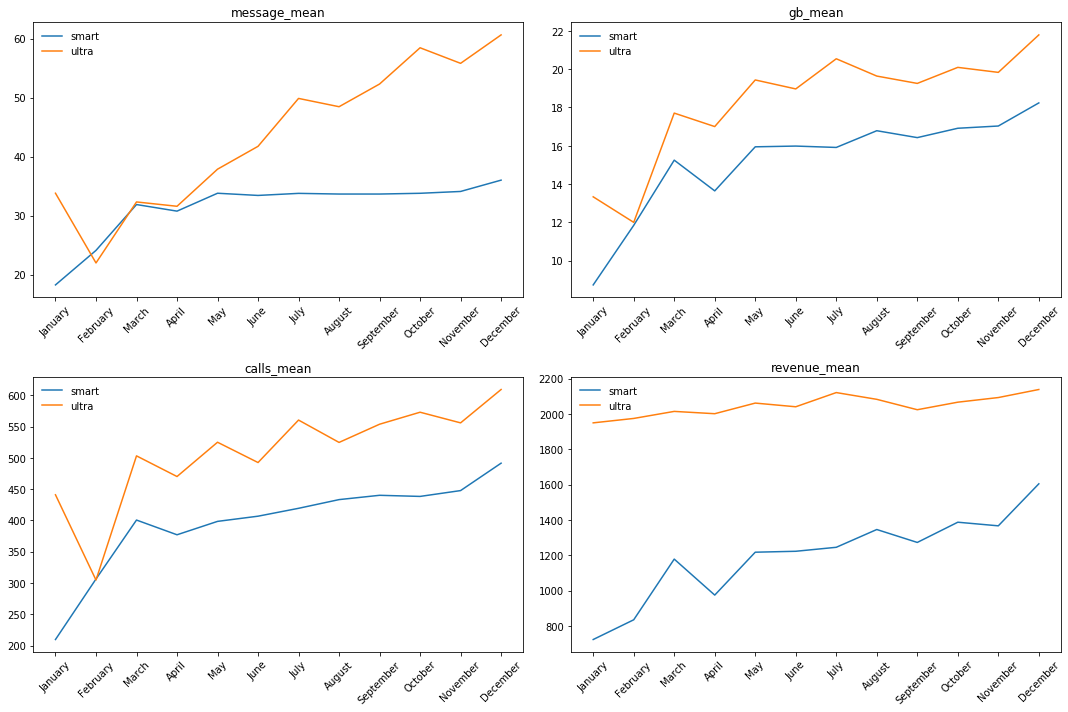

In [100]:
# Построим графики по сгруппированным данным
fig = plt.figure(figsize=(15, 10))
list_of_columns = list(smart_grouped.columns)
counter = 0

for i in range(2):
    for j in range(2):
        plt.subplot2grid((2,2), (i, j)).plot(smart_grouped.index, smart_grouped[ list_of_columns[counter] ],
                                             ultra_grouped.index, ultra_grouped[ list_of_columns[counter] ])
        plt.title("{}".format( list_of_columns[counter]))
        counter+=1
        plt.legend(('smart', 'ultra'), frameon=False)
        plt.xticks(rotation=45)
    
fig.tight_layout()
plt.show()

Видим, что:
1. Все средние показатели почти линейно растут. 
2. Средние показатели тарифа ultra превышают значения тарифа smart

Построим и изучим общие распределения.

In [101]:
# Добавим столбцы с тарифом в исходные таблицы
messages_data['tariff'] = messages_data.merge(users_data, on= 'user_id', how='left')['tariff']
calls_data['tariff'] = calls_data.merge(users_data, on= 'user_id', how='left')['tariff']
internet_data['tariff'] = internet_data.merge(users_data, on= 'user_id', how='left')['tariff']

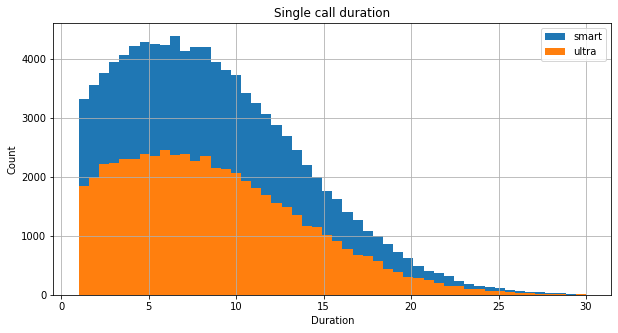

In [102]:
# Построим распределение для длительности звонков по тарифам
fig = plt.figure(figsize=(10, 5))
(calls_data
 .query('duration > 1 and tariff=="smart"')['duration']
 .plot(kind='hist', bins=50, range=(1,30), grid=True)
)

(calls_data
 .query('duration > 1  and tariff=="ultra"')['duration']
 .plot(kind='hist', bins=50, range=(1,30), grid=True)
)

plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Single call duration')
plt.legend(('smart', 'ultra'))
plt.show()

In [103]:
# Выведем меры центральной тенденции
(calls_data
 .query('duration > 1 and tariff=="smart"')
 .describe()
 .join(calls_data.query('duration > 1  and tariff=="ultra"').describe(), how='left', lsuffix='_SMART', rsuffix='_ULTRA')
 [['duration_SMART','duration_ULTRA']]
)

,duration_SMART,duration_ULTRA
count,99233.000000,55359.000000
mean,8.832119,8.816516
std,5.154387,5.174434
min,1.010000,1.010000
25%,4.730000,4.700000
50%,8.120000,8.100000
75%,12.110000,12.100000
max,38.000000,36.120000


Среднее и среднекватратичное отклонение у распределений почти совпадают, кроме того гаусианы внешне похожи между собой. Однако гистограмма по тарифу smart значительно выше чем по ultra.  
Равенство параметров можно объяснить тем, что разовая длина звонков для обоих тарифов примерно равна. Различие по размеру, вызвано тем, что пользователей тарифа smart больше.  
На предыдущих графиках среднемесячная суммарная длина звонков для тарифа ultra выше. Это скорее всего объясняется тем, что пользователи этого тарифа звонят чаще, чем в тарифе smart. Проверим эту гипотезу.

In [104]:
# Выведем суммарное количесвто звонков по обоим тарифам
users_grouped.groupby(['tariff'])['calls_count'].agg(calls_sum = ('calls_count','sum'))

,calls_sum
tariff,
smart,130315.0
ultra,72292.0


Количество звонков по тарифу ultra почти в два раза превышает smart. Гипотеза оказалась верной.

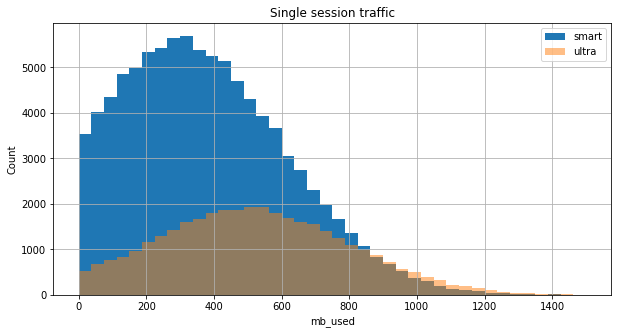

In [105]:
# Построим распределение для интернет траффика по тарифам
fig = plt.figure(figsize=(10, 5))
(internet_data
 .query('mb_used > 0 and tariff=="smart"')['mb_used']
 .plot(kind='hist', bins=40, range=(0,1500), grid=True)
)

(internet_data
 .query('mb_used > 0 and tariff=="ultra"')['mb_used']
 .plot(kind='hist', bins=40, range=(0,1500),  grid=True, alpha=0.5)
)

plt.xlabel('mb_used')
plt.ylabel('Count')
plt.title('Single session traffic')
plt.legend(('smart', 'ultra'))
plt.show()

In [106]:
# Выведем меры центральной тенденции
(internet_data
 .query('mb_used > 0 and tariff=="smart"')
 .describe()
 .join(internet_data.query('mb_used > 0 and tariff=="ultra"').describe(), how='left', lsuffix='_SMART', rsuffix='_ULTRA')
 [['mb_used_SMART','mb_used_ULTRA']]
)

,mb_used_SMART,mb_used_ULTRA
count,93716.000000,36082.000000
mean,385.510421,531.477555
std,237.415281,270.608252
min,0.030000,0.090000
25%,200.077500,331.940000
50%,358.300000,517.555000
75%,540.442500,713.710000
max,1575.260000,1724.830000


Гистограмма по тарифу ultra шире и смещена правее. Пользователи этого тарифа в среднем используют больше траффика. Различие по высоте, вызвано тем, что пользователей тарифа smart больше. На предыдущих графиках среднемесячное потребление траффика для тарифа ultra выше. Это скорее всего объясняется тем же самым: пользователи этого тарифа чаще пользуются интернетом, чем в тарифе smart. Проверим эту гипотезу.

In [107]:
# Выведем суммарное количесвто интернет сессий по обоим тарифам
users_grouped.groupby(['tariff'])['session_count'].agg(session_sum = ('session_count','sum'))

,session_sum
tariff,
smart,111539.0
ultra,37857.0


Количество интернет сессий для ultra превышает smart почти в три раза. Гипотеза подтвердилась.

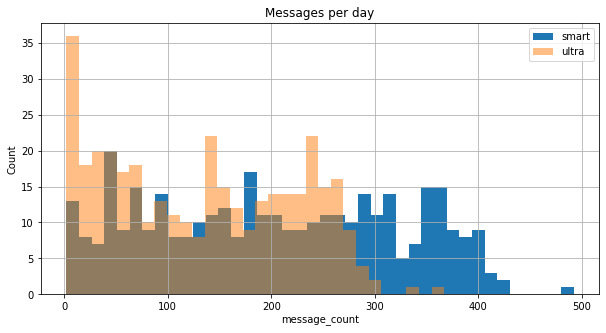

In [108]:
# Построим распределение для сообщений в день по тарифам
fig = plt.figure(figsize=(10, 5))
(messages_data
 .query('tariff=="smart"')
 .groupby('message_date')
 .agg({'message_date':'count'})['message_date']
 .plot(kind='hist', bins=40, grid=True)
)

(messages_data
 .query('tariff=="ultra"')
 .groupby('message_date')
 .agg({'message_date':'count'})['message_date']
 .plot(kind='hist', bins=30, alpha=0.5, grid=True)
)

plt.xlabel('message_count')
plt.ylabel('Count')
plt.title('Messages per day')
plt.legend(('smart', 'ultra'))
plt.show()

График трудно анализировать. Построим гситограмму для количества сообщений в месяц.

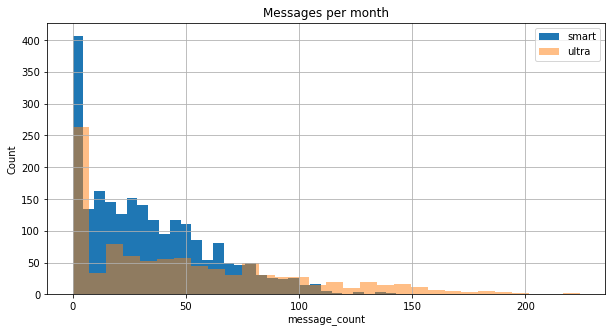

In [109]:
fig = plt.figure(figsize=(10, 5))
(users_grouped
 .query('tariff=="smart"')['message_count']
 .plot(kind='hist', bins=30, grid=True)
)

(users_grouped
 .query('tariff=="ultra"')['message_count']
 .plot(kind='hist', bins=30, grid=True, alpha=0.5)
)

plt.xlabel('message_count')
plt.ylabel('Count')
plt.title('Messages per month')
plt.legend(('smart', 'ultra'))
plt.show()

In [110]:
# Выведем меры центральной тенденции
(users_grouped
 .query('tariff=="smart"')
 .describe()
 .join(users_grouped.query('tariff=="ultra"').describe(), how='left', lsuffix='_SMART', rsuffix='_ULTRA')
 [['message_count_SMART','message_count_ULTRA']]
)

,message_count_SMART,message_count_ULTRA
count,2229.000000,985.000000
mean,33.384029,49.363452
std,28.227876,47.804457
min,0.000000,0.000000
25%,10.000000,6.000000
50%,28.000000,38.000000
75%,51.000000,79.000000
max,143.000000,224.000000


В среднем за месяц пользователи тарифа ultra пишут больше сообщений.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Базовые статистические параметры получены. Приведены все необходимые графики. Здорово, что графики для одинаковых услуг тарифов приведены на одном рисунке. Так удобнее сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>

## Проверка гипотез

Проверим следующую гипотезу: **"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"**.  
Пользователи тарифов - это две не пересекающиеся генеральные совокупности, поэтому речь идет о гипотезе о равенстве средних двух генеральных совокупностей по имеющимся выборкам.
Пусть гипотеза *H0* звучит так: "Средние значения выборок равны", а гипотеза *H1*: "Средние значения выборок не равны".
Для проверки гипотезы применим t-тест Стьюдента. Перед проверкой дисперсии выборок.

In [111]:
print ('Дисперсия тарифа smart:', users_grouped .query('tariff=="smart"')['total_revenue'].var())
print ('Дисперсия тарифа ultra:', users_grouped .query('tariff=="ultra"')['total_revenue'].var() )

Дисперсия тарифа smart: 688973.8957511279
Дисперсия тарифа ultra: 143491.24055961374


Дисперсии сильно отличаются, поэтому на вход методу scipy.stats.ttest_ind в качестве параметра equal_var передадим значение False.

In [112]:
# Проверим гипотезу
alpha = .05

results = st.ttest_ind(
    users_grouped .query('tariff=="smart"')['total_revenue'], 
   users_grouped .query('tariff=="ultra"')['total_revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.2071398635388928e-234
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей тарифов действительно отличается.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Гипотезы сформулированы и проверены верно.

</div>

***

Проверим следующую гипотезу: **"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"**.  
Жители городов - это две не пересекающиеся генеральные совокупности, поэтому речь идет о гипотезе о равенстве средних двух генеральных совокупностей по имеющимся выборкам.
Пусть гипотеза *H0* звучит так: "Средние значения выборок равны", а гипотеза *H1*: "Средние значения выборок не равны".
Для проверки гипотезы применим t-тест Стьюдента. Перед проверкой дисперсии выборок.

In [113]:
# Добавим столбец с городами в сводную таблицу по пользователям
users_grouped['city'] = users_grouped.merge(users_data, on= 'user_id', how='left')['city']
users_grouped.head(5)

,user_id,month,message_count,session_count,mb_total,gb_total,calls_count,calls_total_duration,tariff,total_revenue,city
0,1000,5,22.0,5.0,2256.0,3.0,22.0,164.0,ultra,1950,Краснодар
1,1000,6,60.0,49.0,23257.0,23.0,43.0,187.0,ultra,1950,Краснодар
2,1000,7,75.0,29.0,14016.0,14.0,47.0,346.0,ultra,1950,Краснодар
3,1000,8,81.0,29.0,14070.0,14.0,52.0,418.0,ultra,1950,Краснодар
4,1000,9,57.0,27.0,14581.0,15.0,58.0,478.0,ultra,1950,Краснодар


In [114]:
print ('Дисперсия для жителей Москвы:', users_grouped .query('tariff=="smart" and city=="Москва"')['total_revenue'].var())
print ('Дисперсия для жителей не Москвы:', users_grouped .query('tariff=="smart" and city!="Москва"')['total_revenue'].var())

Дисперсия для жителей Москвы: 582715.5285108675
Дисперсия для жителей не Москвы: 710895.2141159171


Дисперсии сильно отличаются, поэтому на вход методу scipy.stats.ttest_ind в качестве параметра equal_var передадим значение False.

In [115]:
# Проверим гипотезу
alpha = .05

results = st.ttest_ind(
   users_grouped .query('tariff=="smart" and city=="Москва"')['total_revenue'], 
   users_grouped .query('tariff=="smart" and city!="Москва"')['total_revenue'], equal_var = False )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1561906935386063
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка и неодинакова, с вероятностью в 18% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Equal_var надо задать в самом методе. Не зря же ты нашел различия в дисперсиях.
    
</div>

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

## Вывод

Выделим наиболее яркие отличия пользователей двух тарифов.    

Аттрибут | Smart | Ultra
--- | --- | ---
**Суммарная выручка** | 2 923 590 руб  | 2 040 000 руб
**Количество пользователей** | 351  | 149
**Среднее ежемесячное количество сообщений** | 33.38 | 49.36
**Средний ежемесячный расход интернет траффика** | 16.36 Гб | 19.53 Гб
**Среднее ежемесячная суммарная длительность звонков** | 429.45 мин | 540.78 мин


Сравнение пользователей двух тарифов показало, что у тарифа smart больше пользователей, и больше суммарная выручка. В среднем пользователи тарифа ultra чаще совершают звонки, чаще пишут сообщения и тратят больше траффика за один заход в интернет.

В дальнейшем обработанный датасет и полученные результаты можно использовать для обучения регрессионной модели, которая бы предсказывала предполагаемую прибыл, а также расход траффика и звонков для каждого пользователя.

<font color=orange>Вывод стал лучше. Однако большее внимание в нем стоило уделить полученным в работе результатам. Также можно предложить рекомендации для компании по дальнейшим действиям. 
    
---

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<font color=green> Помарки, в целом, исправлены. Теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Разберись с нулевыми значениями в таблице интернет. Рассмотри и обработай пропуски в финальной таблице анализа. После окончания работы напиши подробный финальный вывод о данном проекте. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Все исправил.